In [3]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
convergenceFormulate a robot learning task using machine learning terminology. Describe what are the
inputs and outputs, and how and where the supervision takes part in.

In [84]:
x=np.arange(0,100)/10
y=np.square(x)

In [85]:
import matplotlib.pyplot as plt

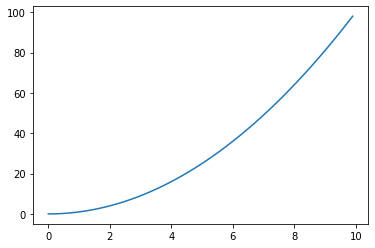

In [70]:
plt.plot(x,y)

In [7]:
data=np.vstack([x,y]).T

In [8]:
data[0]

array([0., 0.])

In [9]:
np.random.shuffle(data)

In [10]:
data=data.T

In [11]:
data[1]

array([3.240e+00, 9.610e+00, 2.116e+01, 2.500e+01, 8.281e+01, 8.464e+01,
       8.836e+01, 6.760e+00, 4.624e+01, 3.610e+00, 1.156e+01, 4.900e+01,
       9.000e-02, 3.721e+01, 1.369e+01, 2.025e+01, 3.969e+01, 7.056e+01,
       5.625e+01, 2.401e+01, 3.025e+01, 5.184e+01, 4.900e-01, 1.681e+01,
       1.440e+00, 4.356e+01, 8.649e+01, 5.476e+01, 3.481e+01, 7.290e+00,
       6.241e+01, 1.600e+01, 6.400e-01, 7.921e+01, 5.776e+01, 6.889e+01,
       3.844e+01, 8.100e-01, 5.290e+00, 2.809e+01, 1.296e+01, 9.409e+01,
       3.364e+01, 1.600e-01, 7.840e+00, 1.521e+01, 2.704e+01, 1.089e+01,
       4.489e+01, 4.410e+00, 1.690e+00, 1.444e+01, 4.840e+00, 1.960e+00,
       1.000e+00, 1.024e+01, 2.601e+01, 5.041e+01, 5.929e+01, 9.025e+01,
       3.249e+01, 9.801e+01, 1.210e+00, 4.000e+00, 3.600e+01, 4.761e+01,
       2.560e+00, 6.250e+00, 4.225e+01, 9.604e+01, 4.096e+01, 6.400e+01,
       4.000e-02, 8.410e+00, 2.250e+00, 1.936e+01, 2.209e+01, 7.744e+01,
       6.724e+01, 6.561e+01, 8.100e+01, 7.225e+01, 

In [12]:
#plt.plot(data[0],data[1])

In [13]:
weights=35
generalization_factor=[i for i in range(weights)]

In [115]:
class Model():
    def __init__(self,data):
        self.weights=np.ones((35,1))
        self.gen_factor=5
        self.x=data[0]
        self.y=data[1]
        
        self.min=0
        self.max=10
        self.weights_no=35
        self.lr=0.001
        self.total_loss=0
        self.total_prev_loss=0
        self.prev_loss=0
        self.total_loss=0
        self.len_of_val=100
        self.dict_for_A={}
        self.ypred_list=[]
        #self.y_=x[1]
        
        self.epochs=100000
        #print([i for i in self.x])
        #self.trial=int(np.floor((no_vector)*((i-self.min)/(self.min-self.max))))
        self.mapping=self.mapping_fn(self.gen_factor)#np.zeros((35,100))


    def mapping_fn(self,gn):
        no_vector=self.weights_no-self.gen_factor+1
        mapp=np.zeros((no_vector,self.weights_no))
        for i in self.x:
            #print(i)
            # if(i<self.min):
            #     index=0
            #     #index=(no_vector)*((i-self.min)/(self.min-self.max))
            #     mapp[:,index:index+self.gen_factor]=1
            #     #return mapp
            # if(i>self.max):
            #     index=34-self.gen_factor
            #     #index=(no_vector)*((i-self.min)/(self.min-self.max))
            #     #print('0')
            #     mapp[:,index:index+self.gen_factor]=1
            #     #return mapp
            # else:
            #if self.gen_factor%2==1:
                #x=np.linspace(0.1,1,self.gen_factor)
                #x[int((len(x)+1)/2 ):]=np.flip(x[:int((len(x)+1)/2)-1])
            x_ind=(no_vector-2)*((i-self.min)/(self.max-self.min))
            if(x_ind)%1!=0:

                index1=int(np.floor((no_vector-2)*((i-self.min)/(self.max-self.min))))
                index2=int(np.ceil(x_ind))
                self.dict_for_A[i]=index1
                mapp[index1,index1]=index1/(index1+index2)
                mapp[index1,index1+1:index1+self.gen_factor]=1
                #self.dict_for_A[i]=index
                mapp[index1,index1+self.gen_factor+1]=index2/(index1+index2)
                #mapp[index1,index1+1:index1+self.gen_factor]=x
            else:
                index=int(np.floor((no_vector-2)*((i-self.min)/(self.max-self.min))))
            #print(index)
                self.dict_for_A[i]=index
                mapp[index,index:index+self.gen_factor]=1
            # else:
            #     x=np.linspace(0.1,1,self.gen_factor)
            #     x[int((len(x))/2 ):]=np.flip(x[:int((len(x))/2)])
            #     index=int(np.floor((no_vector)*((i-self.min)/(self.max-self.min))))
            #     #print(index)
            #     self.dict_for_A[i]=index
            #     mapp[index,index:index+self.gen_factor]=x
        return mapp
    def predict(self,x_A):
        #self.x_A_trail=x_A
        return x_A@self.weights
    
    def loss_fn(self,y_train,y_pred):
        #print(y_train)
        return y_train- y_pred
    
    def backprop(self,x,loss):
        weights=self.weights.copy()
        self.trail_type=type(weights)
        if len(weights.shape)==2:
        
            weights=np.reshape(weights,(weights.shape[0]))
        #print('shape_a_x- ',x.shape)
        #print('shape_weights- ',weights.shape)
        self.weights_trial=weights*self.lr
        
        self.trial_loss=loss 
        weights= weights+loss*weights*x*self.lr 
        weights=np.reshape(weights,self.weights.shape)
        self.weights=weights
        #return weights 
    
    def val_step(self,x,y):
        weights=self.weights
        y_pred=self.predict(x)
        self.ypred_list_v.append(y_pred)
        self.ypred_list.append(y_pred)
        loss=self.loss_fn(y,y_pred)
        self.total_loss+=loss
    def train_step(self,x,y):
        
        weights=self.weights
        y_pred=self.predict(x)
        self.ypred_list.append(y_pred)
        #print(y_pred)
        loss=self.loss_fn(y,y_pred)
        #self.total_loss+=loss
        self.backprop(x,loss)
#     def fit(self):
#         self.total_prev_loss=self.total_loss
#         epochs=self.epochs
#         for e in range(epochs):
#             self.total_prev_loss=self.total_loss
#             self.total_loss=0
#             self.ypred_list=[]
#             for ip,op in zip(data[0,:70],data[1,:70]):
#                 #print(op)
#                 x_train=self.dict_for_A[ip]
#                 x_train=self.mapping[x_train,:]
#                 self.trial=x_train
#                 #y_train=self.dict_for_A[op]
#                 y_train=op
#                 #print(y_train)
#                 self.train_step(x_train,y_train)
#             for ip,op in zip(data[0,70:],data[1,70:]):
#                 x_train=self.dict_for_A[ip]
#                 x_train=self.mapping[x_train,:]
#                 #y_train=self.dict_for_A[op]
#                 y_train=op
#                 self.val_step(x_train,y_train)
                
#             if self.is_converged():
#                 print('converge')
#                 break
#     def is_converged(self):
#         if np.abs(self.total_prev_loss-self.total_loss)<0.0001:
#             return True 
#         else:
#             return False
    def fit(self):
        start=time.time()
        epochs=self.epochs
        for e in range(epochs):
            self.ypred_list_v=[]
            self.total_prev_loss=self.total_loss
            self.total_loss=0
            self.ypred_list=[]
            for ip,op in zip(data[0,:70],data[1,:70]):
                #print(op)
                x_train=self.dict_for_A[ip]
                x_train=self.mapping[x_train,:]
                #self.trial=x_train
                #y_train=self.dict_for_A[op]
                y_train=op
                #print(y_train)
                self.train_step(x_train,y_train)
            for ip,op in zip(data[0,70:],data[1,70:]):
                x_train=self.dict_for_A[ip]
                x_train=self.mapping[x_train,:]
                #y_train=self.dict_for_A[op]
                y_train=op
                self.val_step(x_train,y_train)
            error=self.error(np.array(self.ypred_list_v),data[1,70:])
            print('epoch:',e,' accuracy =',1-(error))     
            if self.is_converged():
                print('converge')
                break
        self.total_time=time.time()-start
    def is_converged(self):
        if np.abs(self.total_prev_loss-self.total_loss)<0.000001:
            return True 
        else:
            return False
    def error(self,y_pred,y_act):
        y_pred=y_pred.reshape(30)
        sub=np.subtract(y_pred,y_act)
        #sqr=np.abs(sub)
 
        sqr=np.square(sub)
        #self.y_p=y_pred
        #self.y_a=data[1]
        
        error=np.sum(sqr)

        total_error=np.sqrt(error)/self.len_of_val
        #self.sub=total_error
        return total_error

In [116]:
list_of_models=[]
if convergence:
#for gn in range(1):#generalization_factor:
    for gn in generalization_factor:
        model=Model(data,gn)
        #model=Model(data,gn)
        model.fit()
        list_of_models.append(model)
        plt.plot(list_gn,list_converge_time,label='dis_cmac')
        #plt.plot(list_cn_2,gn_1,label='cont_cmac')
        plt.legend()
        plt.show()
else:
    model=Model(data,gn=5)
    model.fit()
    x1=np.array(model.ypred_list).reshape(100)
    data_pred=np.vstack([data[0],x1])

    data1=data_pred.copy().T
    data1=data1[(data1[:,0]).argsort()]
    data1=data1.T
    plt.plot(data1[0],data1[1],label='dis_cmac')
    plt.show()
#model.trial_loss
#model.x[1]
#model.mapping.shape
#print(model.mapping)
#data[0,:70]

epoch: 0  accuracy = -1.1697828738600928
epoch: 1  accuracy = -0.9393468675567958
epoch: 2  accuracy = -0.5983056504780948
epoch: 3  accuracy = -0.17708580138041996
epoch: 4  accuracy = 0.2227753857332302
epoch: 5  accuracy = 0.49376329929153784
epoch: 6  accuracy = 0.6170879895024632
epoch: 7  accuracy = 0.6575719129596145
epoch: 8  accuracy = 0.6722939530061505
epoch: 9  accuracy = 0.6812589271878432
epoch: 10  accuracy = 0.6886703985320913
epoch: 11  accuracy = 0.6952003436333541
epoch: 12  accuracy = 0.7010154753440704
epoch: 13  accuracy = 0.7062519235891435
epoch: 14  accuracy = 0.7110370729789643
epoch: 15  accuracy = 0.715473578146907
epoch: 16  accuracy = 0.7196362262691454
epoch: 17  accuracy = 0.723576757176676
epoch: 18  accuracy = 0.7273303603714314
epoch: 19  accuracy = 0.7309212094424274
epoch: 20  accuracy = 0.7343664607708058
epoch: 21  accuracy = 0.7376789071202895
epoch: 22  accuracy = 0.740868647078739
epoch: 23  accuracy = 0.7439440948904005
epoch: 24  accuracy = 0

In [101]:
x1=np.array(model.ypred_list).reshape(100)
data_pred=np.vstack([data[0],x1])

data_t=data_pred.copy().T
data_t=data_t[(data_t[:,0]).argsort()]
data_t=data_t.T

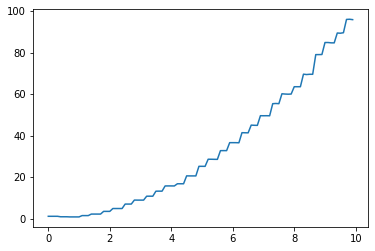

In [102]:
plt.plot(data1[0],data1[1])

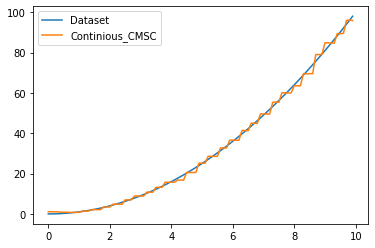

In [99]:
plt.plot(x,y,label='Dataset')
plt.plot(data1[0],data1[1],label='Continious_CMSC')
plt.legend()

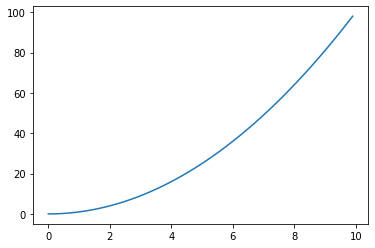

In [82]:
data_pred=np.vstack([data[0],x])

data1=data.copy().T
data1=data1[(data1[:,0]).argsort()]
data1=data1.T
plt.plot(data1[0],data1[1])